## Import Data and Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ecom = pd.read_csv('data.csv')

## Inspect Data

7 columns

InvoiceNo - object <br>
StockCode - object <br>
Description - object (significant some non-null values) <br>
Quantity - int <br>
InvoiceDate - object <br>
UnitPrice - float <br>
CustomerID - float (significant non-null values) <br>
Country - object <br>

In [3]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# drop null values
ecom = ecom.dropna()

### Inspect 'InvoiceNo' column

In [5]:
ecom['InvoiceNo'].nunique()
# 22190 unique invoices

22190

In [6]:
ecom['InvoiceNo'].describe()

count     406829
unique     22190
top       576339
freq         542
Name: InvoiceNo, dtype: object

In [7]:
# calculate value counts per invoice and save to df
ecom_invoice_vc = ecom['InvoiceNo'].value_counts()
invoice_df = ecom_invoice_vc.to_frame(name='invoice_count')

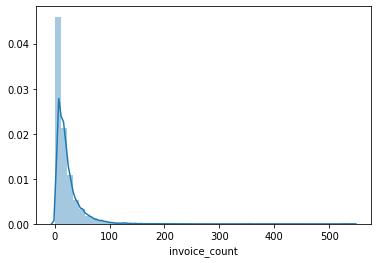

In [8]:
# view distplot of invoice counts
sns.distplot(invoice_df['invoice_count'])

In [9]:
invoice_df['invoice_count'].describe()

count    22190.000000
mean        18.333889
std         23.892111
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        542.000000
Name: invoice_count, dtype: float64

Data is skewed right. Most invoices have 24 items or fewer, but some invoices have up to 542 items.

### Returned items
Invoices that begin with 'C' appear to be returns. Create calculated fields to aid in analysis of returned items.

In [10]:
print(ecom['InvoiceNo'].sort_values())

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540448    C581490
541541    C581499
541715    C581568
541717    C581569
541716    C581569
Name: InvoiceNo, Length: 406829, dtype: object


In [39]:
# create boolean array (True if item is a return, False if not)
s_invoice = ecom['InvoiceNo'].str.contains('C', regex = False)

# convert series to df; rename column 'return'
s_invoice_df = s_invoice.to_frame()
s_invoice_df = s_invoice_df.rename(columns={'InvoiceNo': 'return'})

In [43]:
# merge s_invoice_df with ecom df 
ecom = ecom.merge(s_invoice_df, left_index=True, right_index=True)

In [47]:
# analyze returns
ecom_return_vc = ecom['return'].value_counts()
return_df = ecom_return_vc.to_frame(name='return_count')

#calculate percent of items that are returned
return_df['pct_total'] = return_df['return_count'] / return_df['return_count'].sum()

return_df

,return_count,pct_total
False,397924,0.978111
True,8905,0.021889


2.2% of items are returned.

### Inspect StockCode column

In [14]:
# inspect 'Description' column
ecom['StockCode'].nunique()

# 3684 unique products

3684

### Inspect 'Description' column

In [15]:
# inspect 'Description' column
ecom['Description'].nunique()

# 3896 unique products - 2 items don't have a stock code

3896

In [16]:
# calculate value counts per description and save to df
ecom_desc_vc = ecom['Description'].value_counts()
desc_df = ecom_desc_vc.to_frame(name='desc_count')

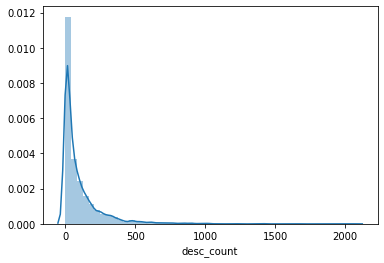

In [17]:
# view distplot of item counts
sns.distplot(desc_df['desc_count'])

In [18]:
desc_df['desc_count'].describe()

count    3896.000000
mean      104.422228
std       161.793099
min         1.000000
25%        11.000000
50%        45.000000
75%       131.000000
max      2070.000000
Name: desc_count, dtype: float64

Data is skewed right. Most items were ordered 131 times or fewer, but the most popular item was ordered 2070 times.

### Inspect 'Quantity' column

In [19]:
ecom['Quantity'].nunique()

436

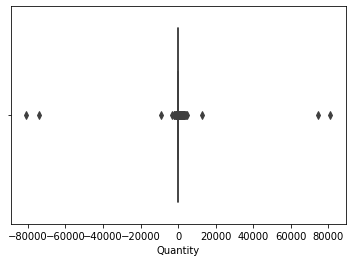

In [20]:
sns.boxplot(x=ecom['Quantity'])

# significant outliers make boxplot difficult to interpret
# remove outliers ?

In [21]:
# calculate value counts per quantity and save to df
ecom_quant_vc = ecom['Quantity'].value_counts()
quant_df = ecom_quant_vc.to_frame(name='quant_count')

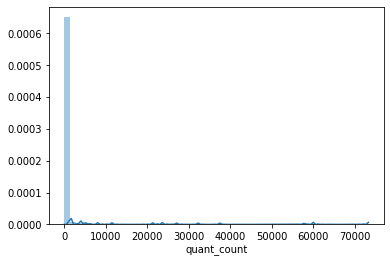

In [22]:
# view distplot of quantity counts
sns.distplot(quant_df['quant_count'])

In [23]:
quant_df['quant_count'].describe()

count      436.000000
mean       933.094037
std       6161.740102
min          1.000000
25%          1.000000
50%          2.000000
75%         15.000000
max      73314.000000
Name: quant_count, dtype: float64

Data has wide distribution. Most items are ordered in quantities of 15 or fewer at a time, but the max quantity is 73314. It is possible that this large quantity is an outlier.

### Inspect 'InvoiceDate' column

In [24]:
ecom['InvoiceDate'].min()

'1/10/11 10:32'

In [25]:
ecom['InvoiceDate'].max()

'9/9/11 9:52'

Data is from between 1/10/11 and 9/9/11

In [26]:
# group by months (?)

### Inspect 'UnitPrice' column

In [27]:
ecom['UnitPrice'].nunique()

620

In [28]:
ecom['UnitPrice'].describe()

# max value may be an outlier (?)

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

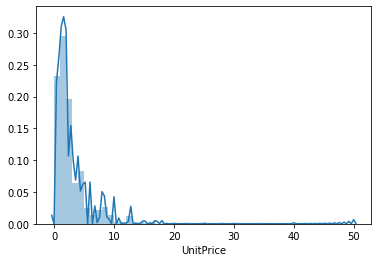

In [29]:
# distplot is difficult to interpret b/c max value is an outlier; 
# filter data to view distribution of most common prices
price_filter = ecom[ecom['UnitPrice'] < 50]

# view distplot of unit prices less than 100
sns.distplot(price_filter['UnitPrice'])

In [30]:
price_lst = ecom['UnitPrice'].unique().tolist()
price_unique_df = pd.DataFrame(price_lst)

In [31]:
## create a list of bin conditions
#conditions = [
#    (price_unique_df[0] > 400),
#    (price_unique_df[0] > 300),
#    (price_unique_df[0] > 200),
#    (price_unique_df[0] > 100),
#    (price_unique_df[0] > 50),
#    (price_unique_df[0] > 40),
#    (price_unique_df[0] > 30),
#    (price_unique_df[0] > 20),
#    (price_unique_df[0] > 10),
#    (price_unique_df[0] > 5),
#    (price_unique_df[0] > 2),
#    (price_unique_df[0] > 1),
#    (price_unique_df[0] <= 1)
#    ]

## create a list of the values to be assigned to each condition
#values = ['A_400plus', 'B_300plus', 'C_200plus', 'D_100plus', 'E_50plus','F_40plus','G_30plus','H_20plus','I_10plus','J_5plus','K_2plus','L_1plus','M_1below']

## create a new column and use np.select to assign values
#price_unique_df['count_cat'] = np.select(conditions, values)

## group by bins
#price_unique_df.groupby(['count_cat']).count()

### Inspect 'CustomerID' column

In [32]:
ecom['CustomerID'].nunique()

# 4372 unique customers

4372

In [33]:
# calculate value counts per customer and save to df
ecom_cust_vc = ecom['CustomerID'].value_counts()
cust_df = ecom_cust_vc.to_frame(name='cust_count')

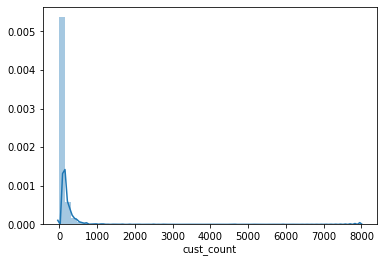

In [34]:
sns.distplot(cust_df['cust_count'])

In [35]:
cust_df['cust_count'].describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
Name: cust_count, dtype: float64

This analysis looks at how often a customer appears in the dataframe, and therefore captures how many items each customer purchased over the period captured in the dataset, not how many orders each customer placed. <br> <br>
The data is skewed right. Most customers purchased 102 items or fewer, but the maximum number of items purchased is 7983.

### Inspect 'Country' column

In [36]:
ecom['Country'].nunique()

# 37 unique countries

37

### Create calculated 'Value' field

value = UnitPrice * Quantity; Calculates total revenue per item. 

In [37]:
# create 'value' column
ecom['value'] = ecom['UnitPrice'] * ecom['Quantity']

### Inspect value by invoice number

In [68]:
value_invoice = ecom.groupby(['InvoiceNo']).sum().sort_values(['value'], ascending=False)

Several of the most expensive orders have equivalent refunds. This indicates that these orders were mistakes and may be responsible for some of the outliers previously identified.

Drop: <br>
581483 / C581484, <br>
541431 / C541433, <br>
556444 / C556445, <br>
550461 / C550456

### Inspect value by customer

The median customer purchased 648 worth of merchandise between 1/10/11 and 9/9/11. 75 pct. of customers spent 1,612 or less. The data is skewed right - several customers over 100,000 worth of merchandise, and the max spend was 279,489.

In [65]:
value_customer = ecom.groupby(['CustomerID']).sum().sort_values(['value'], ascending=False)

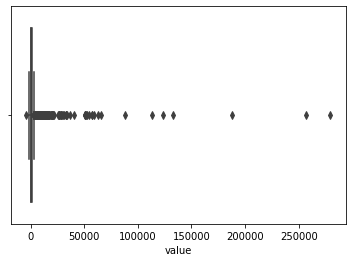

In [60]:
sns.boxplot(x=value_customer['value'])

In [63]:
value_customer['value'].describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: value, dtype: float64